## Import Data

In [1]:

import requests
import pandas as pd
import json

API_KEY = "67ae48d1769ef00a170769e5"

params = {
    "key": API_KEY,
    "appid": 440,
    "item": "Mann Co. Supply Crate Key",
    "quality": 6,
    "priceindex": 0
}

url = "https://backpack.tf/api/IGetPriceHistory/v1"

response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()


## Get timestamps, values, and dates

In [2]:
from datetime import *

history = data.get("response", {}).get("history", {})

timestamps = []
readables = []
values = []
dateObjs = []
for i in range(0,len(history)):
   timestamp = (history[i]["timestamp"])
   value = (history[i]["value"])
   readable = datetime.fromtimestamp(timestamp,UTC).strftime('%Y-%m-%d %H:%M:%S UTC') if timestamp else "Unknown Date"
   dateObj = datetime.fromtimestamp(timestamp,UTC)
   timestamps.append(timestamp)
   readables.append(readable)
   values.append(value)
   dateObjs.append(dateObj)




## Create list of months
Ranges from the beginning of data to end of data

In [3]:
dates = pd.date_range(start="2012-07-01", end="2025-02-01", freq="MS").tolist()  # 'MS' means Month Start

## Consolidate data monthly

In [4]:
# Remove timezone values for dateObjs from real data 
dateObjs = [dt.replace(tzinfo=None) for dt in dateObjs]

cleanList = []
for i in range(0,len(dates)- 1):
    feasible = []
    for j in range(0,len(dateObjs)):
        if dateObjs[j] > dates[i] and dateObjs[j] < dates[i+1]:
            feasible.append(values[j])
    cleanList.append(feasible)
        

In [5]:
import pandas as pd
test = pd.DataFrame({"dates": dates[0:len(dates) -1], "values" : cleanList})

avgList = []
for i in range(0,len(test)):
    avgList.append(pd.Series(test.loc[i,"values"]).mean())
    
test['avgVal'] = avgList

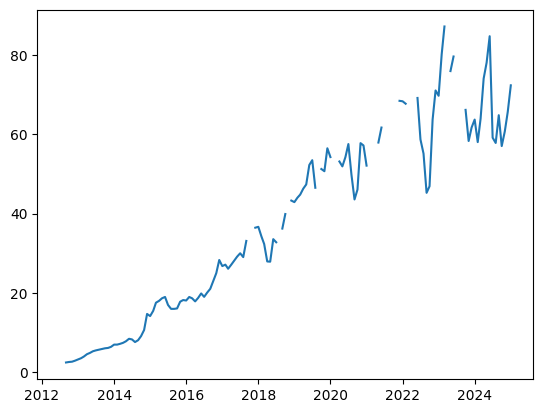

In [6]:
import matplotlib.pyplot as plt
plt.plot(test['dates'],test['avgVal'])

In [11]:
test.to_csv("tf2Key.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup

# URL of the SteamDB page for TF2
url = "https://steamdb.info/app/440"

# Headers (to mimic a real browser)
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
}

# Make the request
response = requests.get(url, headers=headers)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    # Find the peak player count
    peak_player_tag = soup.find("td", class_="text-right", attrs={"data-sort": True})

    if peak_player_tag:
        peak_players = peak_player_tag.text.strip()
        print(f"Peak Players: {peak_players}")
    else:
        print("Could not find peak player count.")
else:
    print(f"Failed to retrieve page: {response.status_code}")


Failed to retrieve page: 403


In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\emant\AppData\Roaming\nltk_data...


True

In [4]:
from nltk.corpus import wordnet

def get_synonyms(word):
    synonyms = set()
    for synset in wordnet.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name())  # Extracting the synonym name
    return list(synonyms)

# Example usage:
print(get_synonyms("great"))




['large', 'nifty', 'capital', 'not_bad', 'expectant', 'swell', 'enceinte', 'big', 'groovy', 'dandy', 'outstanding', 'slap-up', 'heavy', 'with_child', 'smashing', 'cracking', 'keen', 'gravid', 'peachy', 'great', 'bang-up', 'corking', 'majuscule', 'bully', 'neat']
